<a href="https://colab.research.google.com/github/greeshmaunni1990/PyTorch-For-ML-DL/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import torch
from torch import nn # nn will have PyTorch's building block for neural network
import matplotlib.pyplot as plt

torch.__version__

'1.12.1+cu113'

### Data Preparing and Loading

Data can be anything in Machine Learning

* Excel Spreadsheet
* Images
* Videos
* Audios
* Text
* DNA

Machine Learning is of two parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in numerical representation.

In [40]:
# Let us use Linear Regression formula and 
# creare a straight line using known parameters

# create known paramteres
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02

# unsqueeze will add additional dimension for later purpose
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print('X is :', X[:10])
print('y is :', y[:10])
print('Length of X is :', len(X))
print('Length of y is :', len(y))

X is : tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y is : tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
Length of X is : 50
Length of y is : 50


### Splitting data into training and test sets

In [41]:
# create train/test split
# here we are doing 80-20 split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print('len of X_train', len(X_train))
print('len of y_train', len(y_train))
print('len of X_test', len(X_test))
print('len of y_test', len(y_test))

len of X_train 40
len of y_train 40
len of X_test 10
len of y_test 10


### Visualize Data

In [42]:
def plot_predictions(train_data=X_train,
                      train_labels=y_train, test_data=X_test,
                     test_labels=y_test, predictions=None):
  plt.figure(figsize=(10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

  # plot testing data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  # if there is predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  # show the legend
  plt.legend(prop={'size':14})

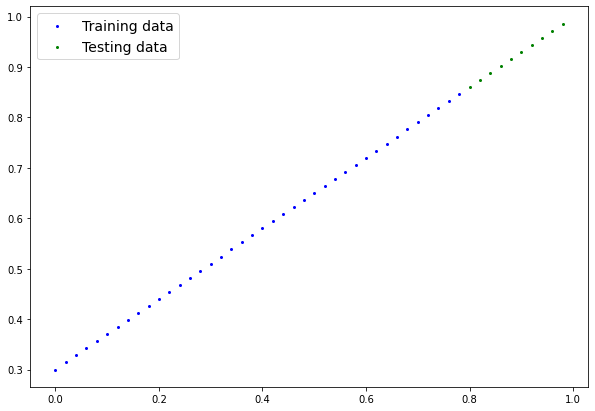

In [43]:
plot_predictions()

### Build model in PyTorch

What model does :

* Start with random values(weight and bias)
* Look at the training data and adjust the random values to better represent the ideal values(weight and bias we used)

Model mainly uses two algorithms:
1. Gradient Descent
2. Backpropogation

In [44]:
# Create Linear Regression class
# nn.Module contains all the building blocks for neural networks
# requires_grad =True will track the gradient of the parameters for Gradient 
# Descent
class LinearRegressionModel(nn.Module):
  # Initialize model parameters
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True,
                                         dtype=torch.float))
    
  # perform computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias 


### PyTorch model building essentials

* torch.nn -> contains all building blocks for computational graphs.
*  torch.nn.Parameter -> what parameter should our model try and learn
* torch.nn.Module -> base class for all neural networks
* torch.optim -> optimization is done which will help with Gradient Descent
* def forward() -> all nn.module require you to overwrite forward() which helps in forward computation

In [121]:
# create random seed
torch.manual_seed(42)

# create an intsance of model
model_0 = LinearRegressionModel()

# parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [112]:
# list the named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using torch.`inference_mode()`

Predicts `y_test` based on `x_test`.

Data will be passed through `forward` method

In [113]:
# make predictions with model
with torch.inference_mode():
 
  y_pred = model_0(X_test)
y_pred = y_pred.detach().numpy()

y_pred

array([[0.3981617 ],
       [0.40489548],
       [0.41162932],
       [0.41836315],
       [0.42509693],
       [0.43183076],
       [0.43856454],
       [0.44529837],
       [0.45203215],
       [0.45876598]], dtype=float32)

In [101]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

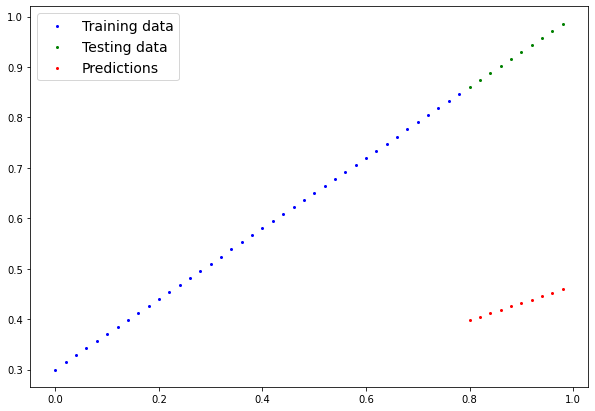

In [114]:
plot_predictions(predictions=y_pred)

### Train Model

Move a model from *unknown* parameters(random) to *known* parameters or from a poor representation of data to a better representation of data

One way to measure the performance of the model is to use `loss function(cost fucntion)`.

Things we need:

* **Loss Fucntion:** measure how wrong our model's prediction are to the ideal outputs(Lower is better).

* **Optimizer:** will take the loss of a model and adjust the model parameters(weights and bias) to improve the loss function.
  Two parameters of optimizers are:
    * params: Parameters you want to optimize.(params=model_0.parameters()
    * lr(learning rate): Hyper parameter that defines how big or small the optimizer can change the parameters.

* **Training Loop**
* **Testing Loop**


In [122]:
# Setup a loss function
#L1Loss is a mean absolute error
loss_fn = nn.L1Loss()

# Setup optimizer(stochastic Gradient Descent)
# Stochastic means Random meaning the SGD will randomnly adjust the parameters(weight, bias)
# and when it notice that random values have minimised the loss function, it will keep
# on adjusting the parameters in the same direction upto a point where the tuning of the
# parameter is no longer going to affect the loss function.
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # learning rate is the hyper parameter that we can set.
# Higher the learning rate, higher will be the change in parameter
# Likewise, smaller the learning rate, smaller will be the change in parameter.

### What loss function and optimizer should we use??

-> For **Regression** use loss function `nn.L1Loss()`(Mean Absolute Error) and optimizer `torch.optim.SGD()`

-> For **Classification** use loss function `nn.BCELos()`(Binary Cross Entropy Loss)

### Building Training Loop(and Testing Loop) in PyTorch

Steps for training loop:
* Loop through the data and do the following steps:
  * Forward pass(data moving in the forward direction) aka **Foward propagation**
  * Calculate the loss(compare the predictions with the test labels)
  * Optimizer zero grad
  * Loss backward - move backward through the network to calculate the gradients of each parameters with respect to the loss (**Backward Propagation**)
  * Optimizer- use the optimizer to adjust the model parameters to reduce the loss(**gradient descent**)


In [90]:
torch.manual_seed(42)
# epoch is one loop through data
epochs = 110

# Training will start from here
#0. Loop through data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode will set all paramaters that requires gradients to require gradients

  #1. Forward pass(where we will pass the train data to our model)
  y_pred = model_0(X_train)

  #2. calculate the loss
  loss = loss_fn(y_pred, y_train)
  print('loss', loss)

  #3. Optimizer Zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Perform gradient descent step by step(always so this after back propogation)
  # by default the change in optimizer will be accumulated through the loop.
  # so we have to zero them in step 3 for the next iteration
  optimizer.step()

  # print model state_dict
  print(model_0.state_dict())


loss tensor(0.3129, grad_fn=<L1LossBackward0>)
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
loss tensor(0.3014, grad_fn=<L1LossBackward0>)
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
loss tensor(0.2898, grad_fn=<L1LossBackward0>)
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
loss tensor(0.2783, grad_fn=<L1LossBackward0>)
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
loss tensor(0.2668, grad_fn=<L1LossBackward0>)
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
loss tensor(0.2553, grad_fn=<L1LossBackward0>)
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
loss tensor(0.2438, grad_fn=<L1LossBackward0>)
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
loss tensor(0.2322, grad_fn=<L1LossBackward0>)
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
loss tensor(0.2207, grad_fn=<L1LossBackw

### What happens in the above code:

* `for epoch in range(epochs):` -> Pass the data through the model for the number of epochs. epochs are hyperparameters where the user can set it accordingly.

* `model_0.train()` -> track the gradients and do the training behind the scene.

* `y_pred = model_0(X_train)` -> Forward pass is done in training data in training loop. In the training loop model will learn the patterns where as in testing loop will evaluate the patterns the model has learned on unseen data.
 
* `loss = loss_fn(y_pred, y_train)` -> determines how wrong the model predictions are.

* `optimizer.zero_grad()` -> optimizer in step 5 will accumulate the gradients of ech parameters with requires_grad = True. So this step will zero the optimizer gradients

* `loss.backward()` -> performs backpropagation on the loss function(compute the gradient of every parmater with require_grad=True)

* `optimizer.step()` -> step the optimizer to update the model parameters with respect to  the gradients obtained by backward propagation.




In [126]:
# make predictions
with torch.inference_mode():
  y_pred_new = model_0(X_test)
y_pred_new = y_pred_new.detach().numpy()

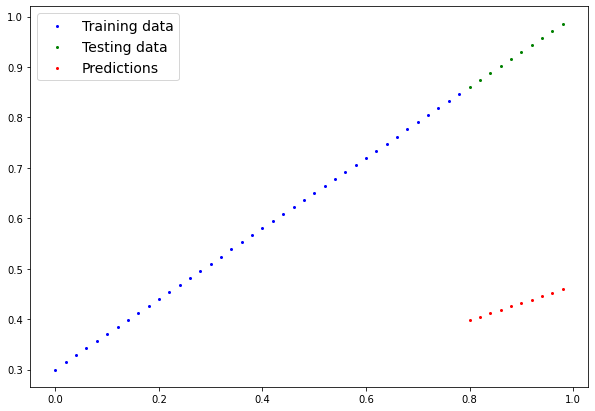

In [115]:
# plot old prediction
plot_predictions(predictions=y_pred)

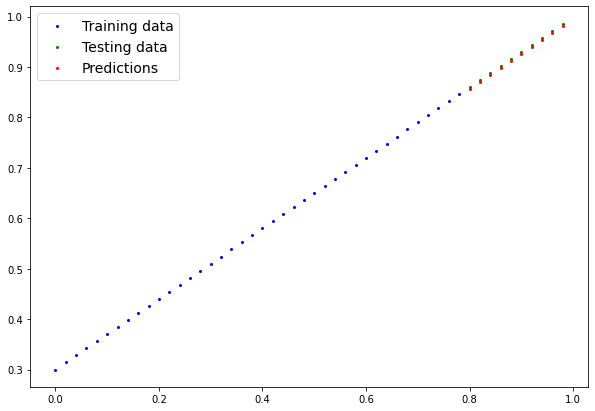

In [127]:
# plot the new predictions after making the new predictions after reducing the loss function
# Here we can see that the predictions are moving closer to the test data after
# reducing the error and optimization
# it will change as we keep tuning the epochs 
plot_predictions(predictions=y_pred_new)

### Testing Loop code

In [125]:
torch.manual_seed(42)
# epoch is one loop through data
epochs = 100

# Training will start from here
#0. Loop through data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode will set all paramaters that requires gradients to require gradients

  #1. Forward pass(where we will pass the train data to our model)
  y_pred = model_0(X_train)

  #2. calculate the loss
  loss = loss_fn(y_pred, y_train)
  

  #3. Optimizer Zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Perform gradient descent step by step(always so this after back propogation)
  # by default the change in optimizer will be accumulated through the loop.
  # so we have to zero them in step 3 for the next iteration
  optimizer.step()

  ### TESTING
  model_0.eval() # we turn off different settings in the modelwhich is not needed
                 # for evaluation or testing(droput/batch morm layers)
  # with totch.inference_mode also does the same function as that of with torch.inference_mode()
  # but torch.inference_mode() is faster.
  with torch.inference_mode(): # will turn off gradient tracking and other settings behind the scene
    #1. Forward pass
    test_pred = model_0(X_test)

    #2. calculate the loss
    # Never let your model see test daata before evaluation
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:                          
    print(f"Epoch: {epoch}, Loss: {loss}, Test_loss: {test_loss}")

    # print model state_dict
    print(model_0.state_dict())


Epoch: 0, Loss: 0.01587124727666378, Test_loss: 0.036468543112277985
OrderedDict([('weights', tensor([0.6227])), ('bias', tensor([0.3323]))])
Epoch: 10, Loss: 0.012435992248356342, Test_loss: 0.028196018189191818
OrderedDict([('weights', tensor([0.6399])), ('bias', tensor([0.3253]))])
Epoch: 20, Loss: 0.008997755125164986, Test_loss: 0.020610356703400612
OrderedDict([('weights', tensor([0.6568])), ('bias', tensor([0.3178]))])
Epoch: 30, Loss: 0.005569315515458584, Test_loss: 0.012337815947830677
OrderedDict([('weights', tensor([0.6740])), ('bias', tensor([0.3108]))])
Epoch: 40, Loss: 0.0021323717664927244, Test_loss: 0.004065275192260742
OrderedDict([('weights', tensor([0.6912])), ('bias', tensor([0.3038]))])
Epoch: 50, Loss: 0.0025885067880153656, Test_loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch: 60, Loss: 0.0025885067880153656, Test_loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3

In [ ]:
# to make the red dot meets the green dot(predictions to meet the test data)
# run the above cell again(you dont have to initialize the model again)
# because on the first run all the parameters are optmized pretty good.
# so we can work on the same data